In [177]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# Pair Programming Intro Machine Learning
### Ana G y Ana C

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. 

Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. 

De forma que vamos a probar a realizar **ajustes lineales** con el fin de predecir alguna de sus **variables**. 
Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

# Objetivos

Los objetivos de hoy son:

- Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables **numéricas** y **categóricas**, primando que haya más de una variable de tipo numérico.
- Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten **ligeramente limpios** para facilitar los análisis.
- Explicar los **datos** y las **variables** disponibles en el conjunto de datos seleccionado:
- Esto se hace para que **comprendais** mejor los datos con los que estais trabajando.
- Realizar un **EDA** sencillo para la variable **dependiente** y la variable **independiente**.

---

In [178]:
df = pd.read_csv("../data/00-insurance.csv", index_col = 0).reset_index()
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## Entender las variables que tenemos y como es nuestro dataframe. 

In [95]:
# número de filas y columnas del dataframe

df.shape

(1338, 7)

In [96]:
# información general del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [97]:
# nombre de las columnas de nuestro dataframe

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Estadísticos 

In [98]:
# principales estadísticos de las columnas numéricas. recordemos que por defecto el describe nos devuelve las numéricas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [99]:
# principales estadisticos de las variables categóricas

df.describe(include ="object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


---

## Nulos 

In [100]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### No tiene

---

## Duplicados

In [101]:
# duplicados 

df.duplicated().sum()

1

In [102]:
df[df.duplicated()== True] # Para ver la fila duplicada

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [103]:
df.drop_duplicates(inplace=True)

In [104]:
df.duplicated().sum()

0

## Tiene uno lo eliminamos

---

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


---

# Outliers

In [106]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


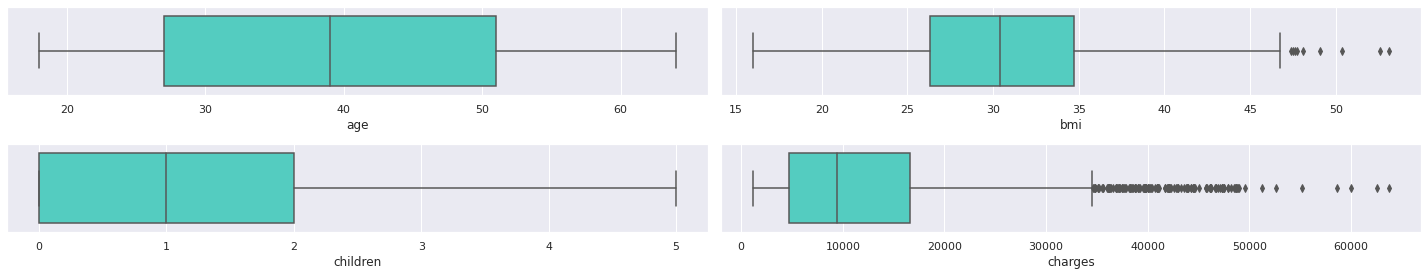

In [107]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad  
plt.tight_layout()
plt.show();

Como hemos visto en los boxplot que hay muchos outlier, vemos las distribuciones para decidir el tratamiento, aún no vamos a hacer nada con ellos, antes de ver si desdoblamos el dataset o no.

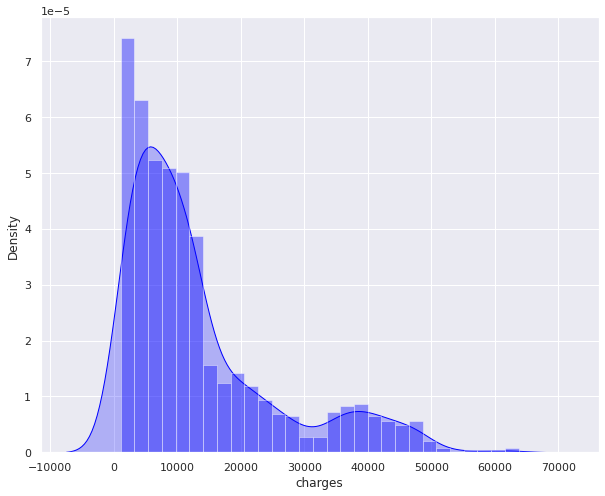

In [108]:
# vamos a ver visualmente como está distribuida la variable respuesta
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"], 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});


Vemos que hay aparentemente claras dos tendencias en charges, vamos a ver si encontramos el punto de división en base a nuestras variables predictoras.

## Analizamos las variables numéricas del dataset

### Distribuciones

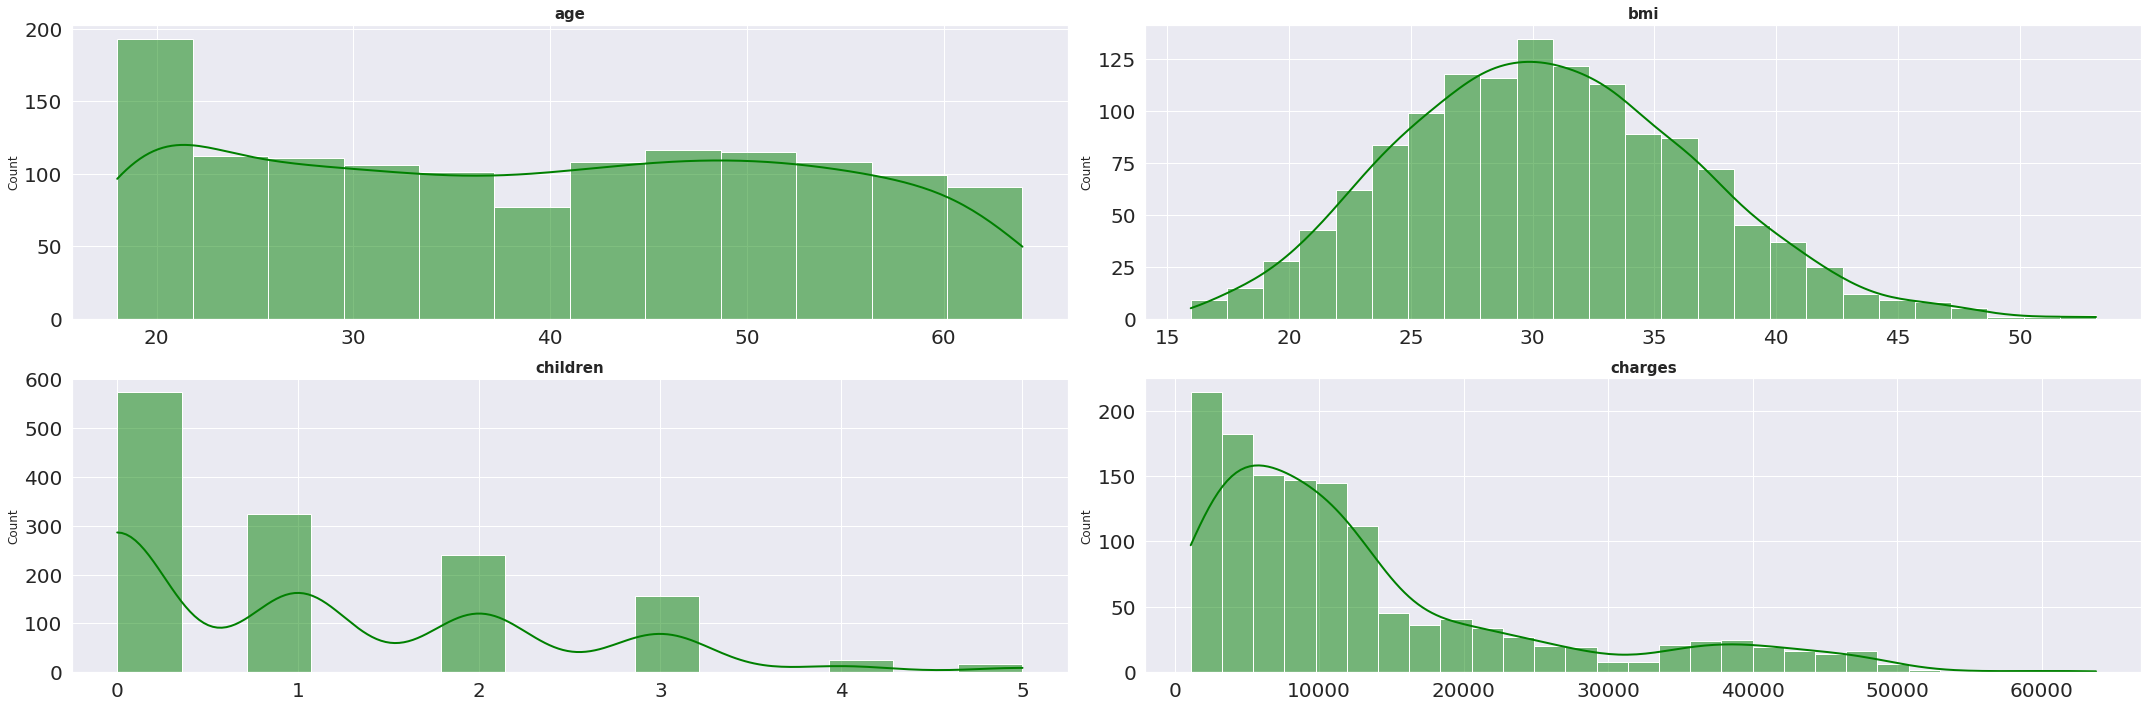

In [109]:
# Gráficos de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas.columns): 
    sns.histplot(
        data = numericas[colum],
        kde = True,
        color = "green", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

### Relación con la variable respuesta

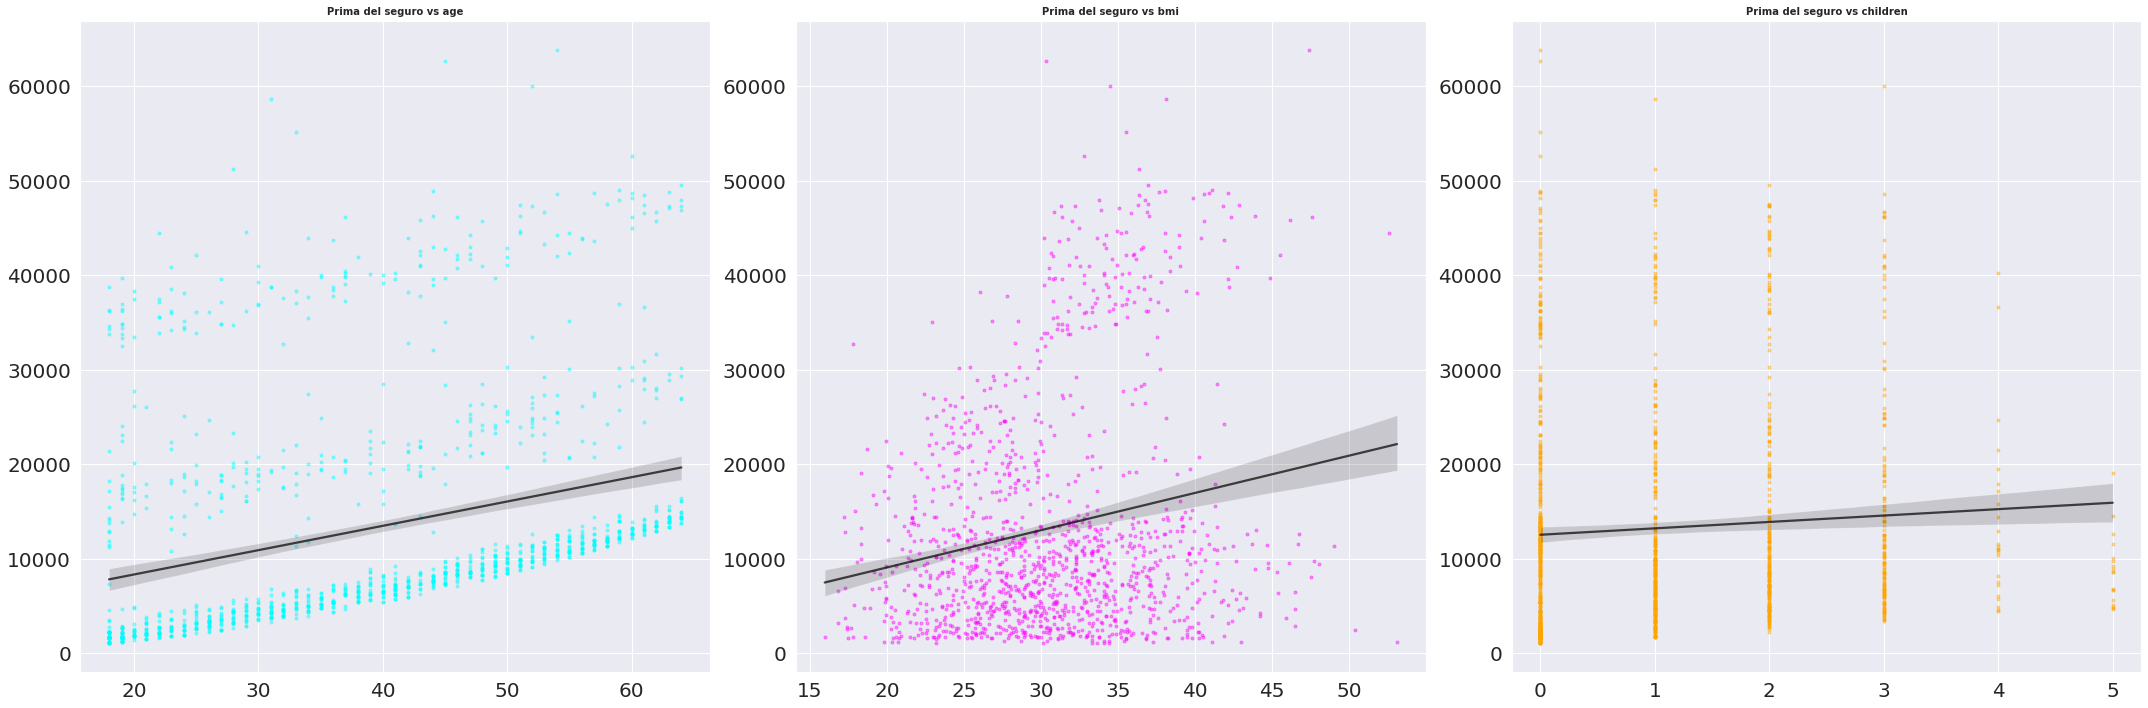

In [110]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))
axes = axes.flat
lista_colores = ["cyan", "magenta", "orange"]

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = lista_colores[i], 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Prima del seguro vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();


Aquí vemos, que en edad, hay como tres lineas claras de tendencia de distribución de nuestros datos.

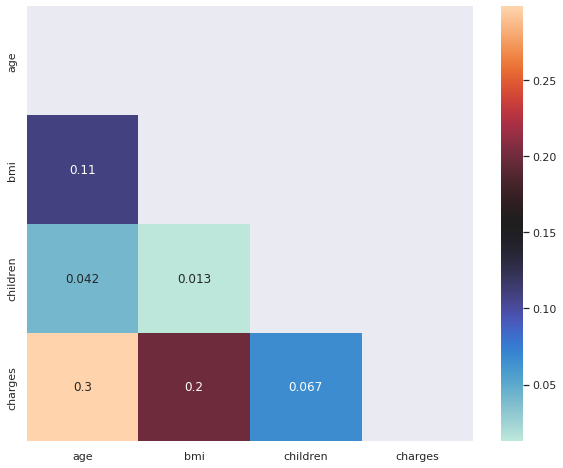

In [111]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
sns.heatmap(df.corr(), 
           cmap = "icefire", 
            mask = mask,
           annot = True);

### Aparentemente, la más relacionada, es la edad

## Variables categóricas

### Creamos algunas gráficas para profundizar en los datos

### Region

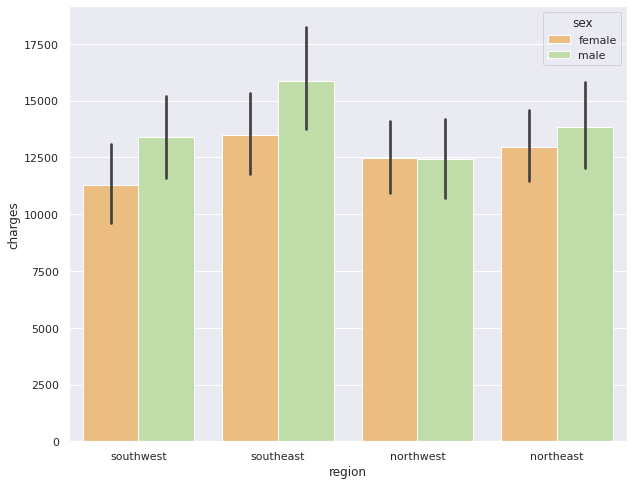

In [112]:
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Spectral');

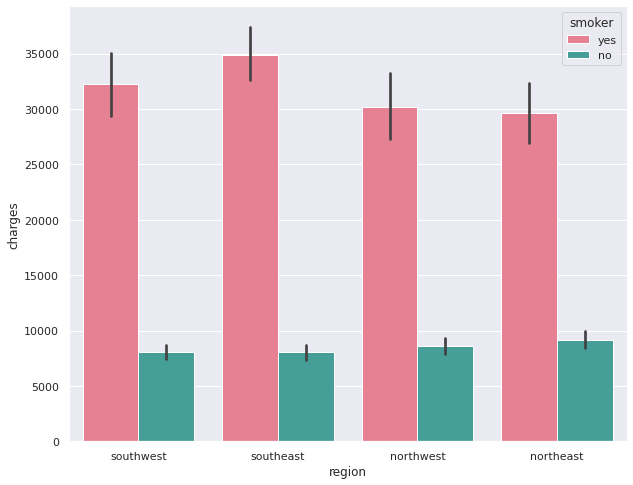

In [113]:
sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='husl');

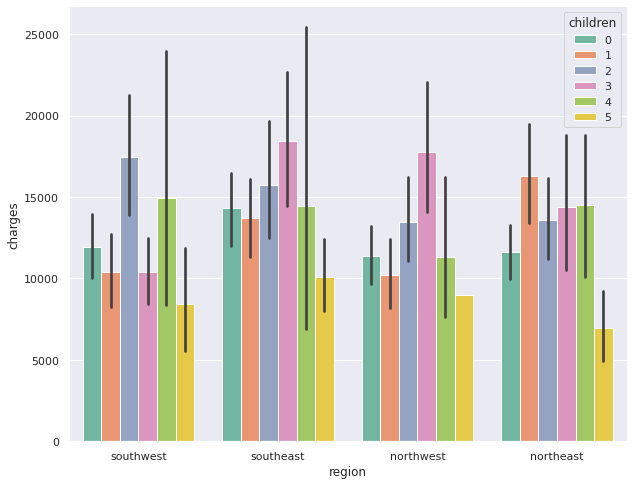

In [114]:
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2');

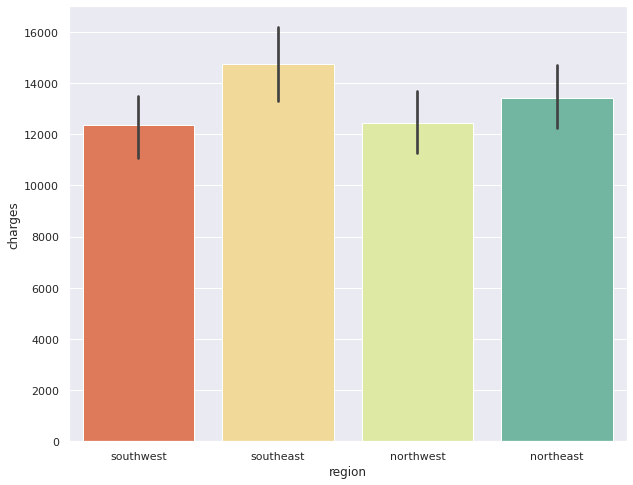

In [115]:
sns.barplot(x='region', y='charges', data=df, palette='Spectral');

Vemos que hay cierta relacion entre region y primas, pero no es muy acusada y tampoco de momento vemos demasiada lógica en la relación

---

### Children

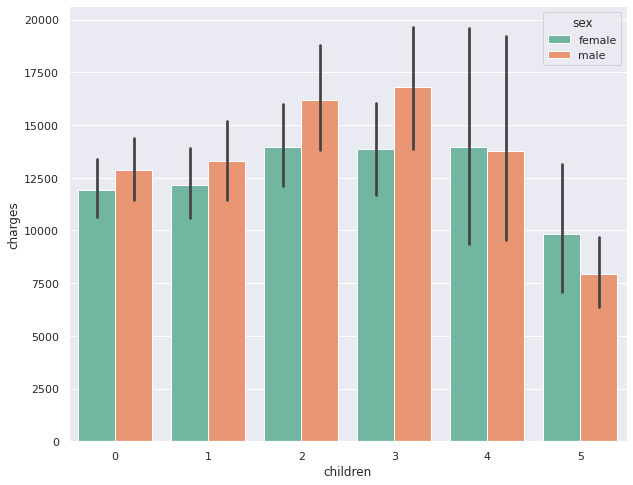

In [116]:
sns.barplot(x='children', y='charges', hue='sex', data=df, palette='Set2');

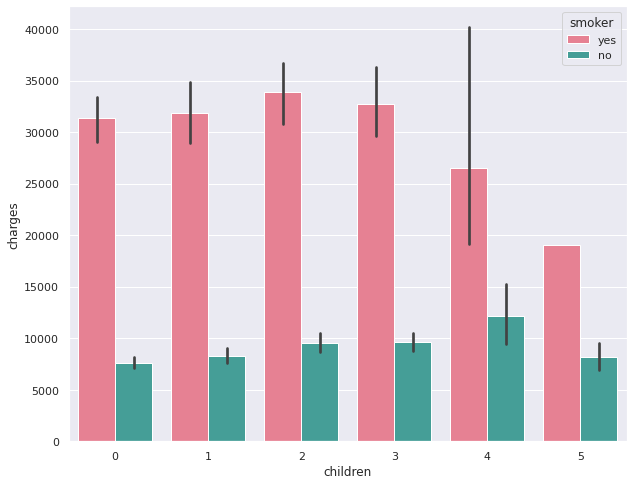

In [117]:
sns.barplot(x = 'children', y = 'charges',
                 hue='smoker', data=df, palette='husl');

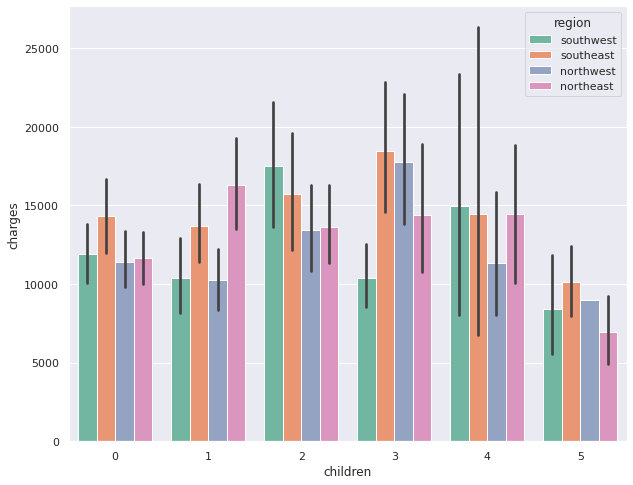

In [118]:
sns.barplot(x='children', y='charges', hue='region', data=df, palette='Set2');

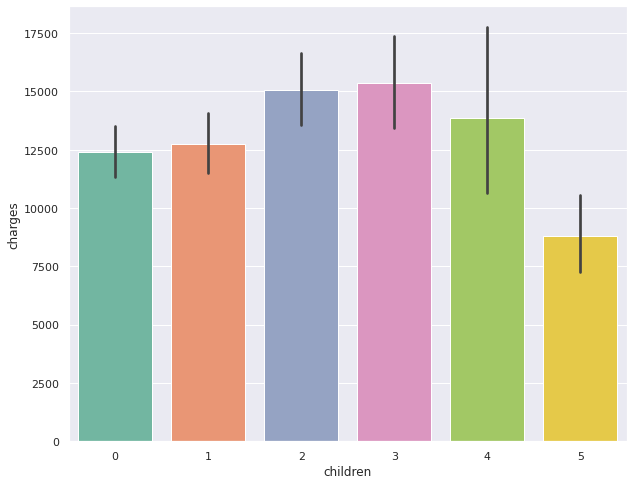

In [119]:
sns.barplot(x='children', y='charges', data=df, palette='Set2');

Vemos que las primas de 0 a 3 personas dependientes, estan en orden creciente de primas, pero, a partir de 3, empieza a descender, tampoco vemos clara la relación.

---

### Smoker

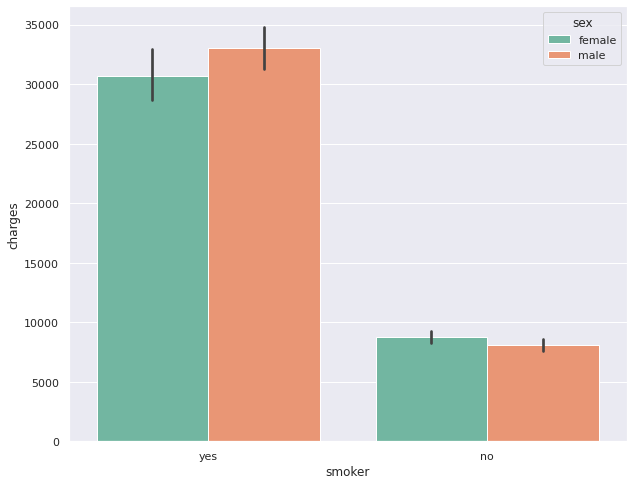

In [120]:
sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='Set2');

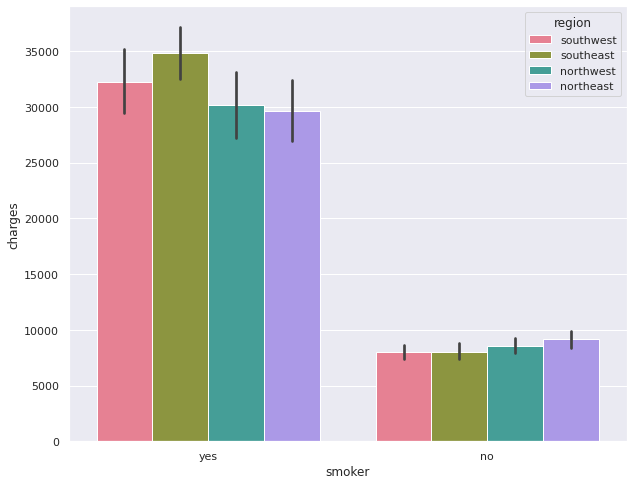

In [121]:
sns.barplot(x = 'smoker', y = 'charges',
                 hue='region', data=df, palette='husl');

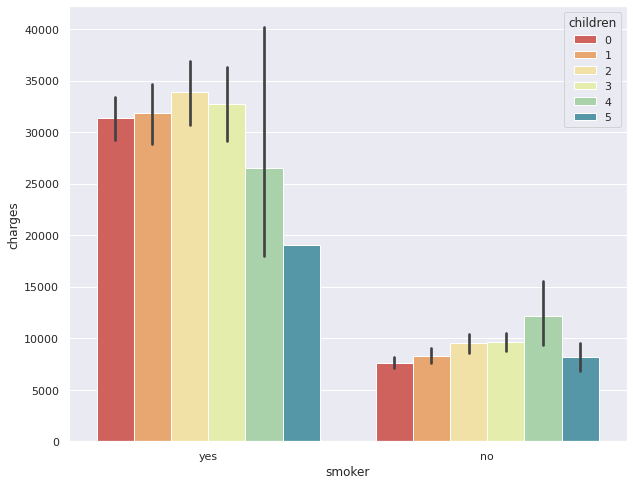

In [122]:
sns.barplot(x='smoker', y='charges', hue='children', data=df, palette='Spectral');

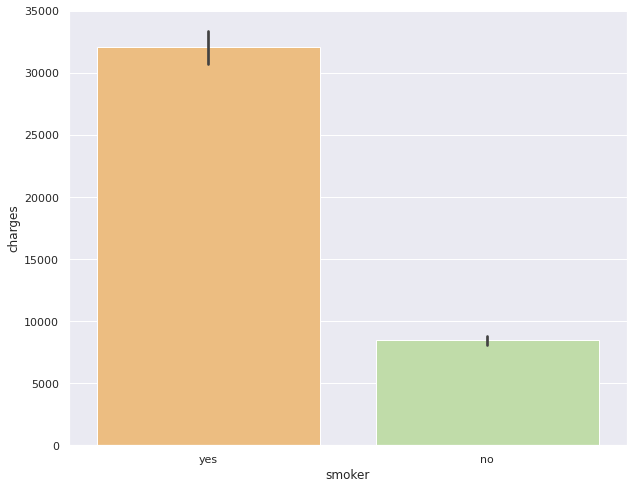

In [123]:
sns.barplot(x='smoker', y='charges', data=df, palette='Spectral');

Vemos una relación bastante clara con hábitos tabáquicos y el importe de las primas

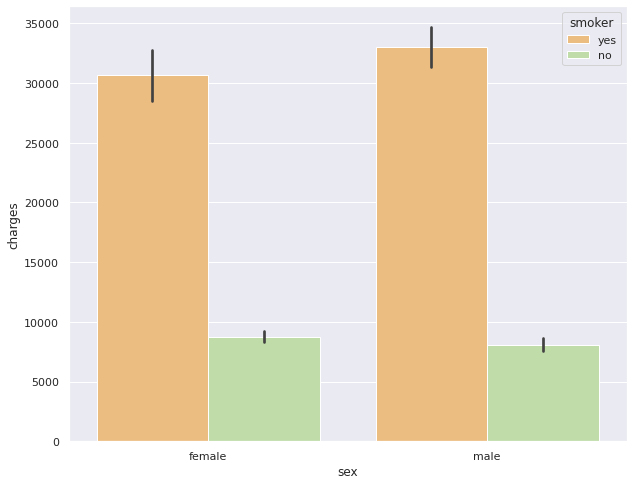

In [181]:
sns.barplot(x='sex', y='charges',hue='smoker' ,data=df, palette='Spectral');
#vemos la distribución de cargos por sexo

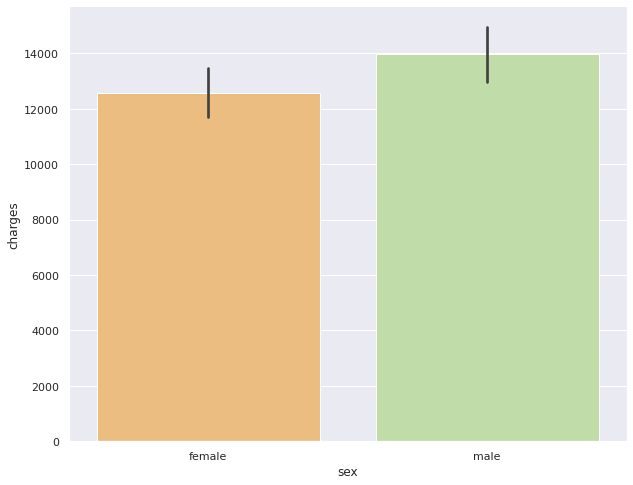

In [183]:
sns.barplot(x='sex', y='charges', data=df, palette='Spectral');
#vemos la distribución de cargos por sexo

---

### Vamos a decidir si partir nuestro dataset en base a las variables predictoras que vemos que pueden condicionar nuestra distribución de datos de la variable respuesta, en nuestro caso, vamos a estudiar dividirlo según habitos tabaquicos o según edad.

## Para personas fumadoras

In [124]:
df1 = df[(df['smoker'] == 'yes')]
df1.sample(5)

,age,sex,bmi,children,smoker,region,charges
301,53,female,22.610,3,yes,northeast,24873.38490
916,43,female,26.885,0,yes,northwest,21774.32215
1093,22,female,30.400,0,yes,northwest,33907.54800
725,30,female,39.050,3,yes,southeast,40932.42950
803,18,female,42.240,0,yes,southeast,38792.68560


In [125]:
numericas1 = df1.select_dtypes(include = np.number)
numericas1.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
11,62,26.29,0,27808.7251


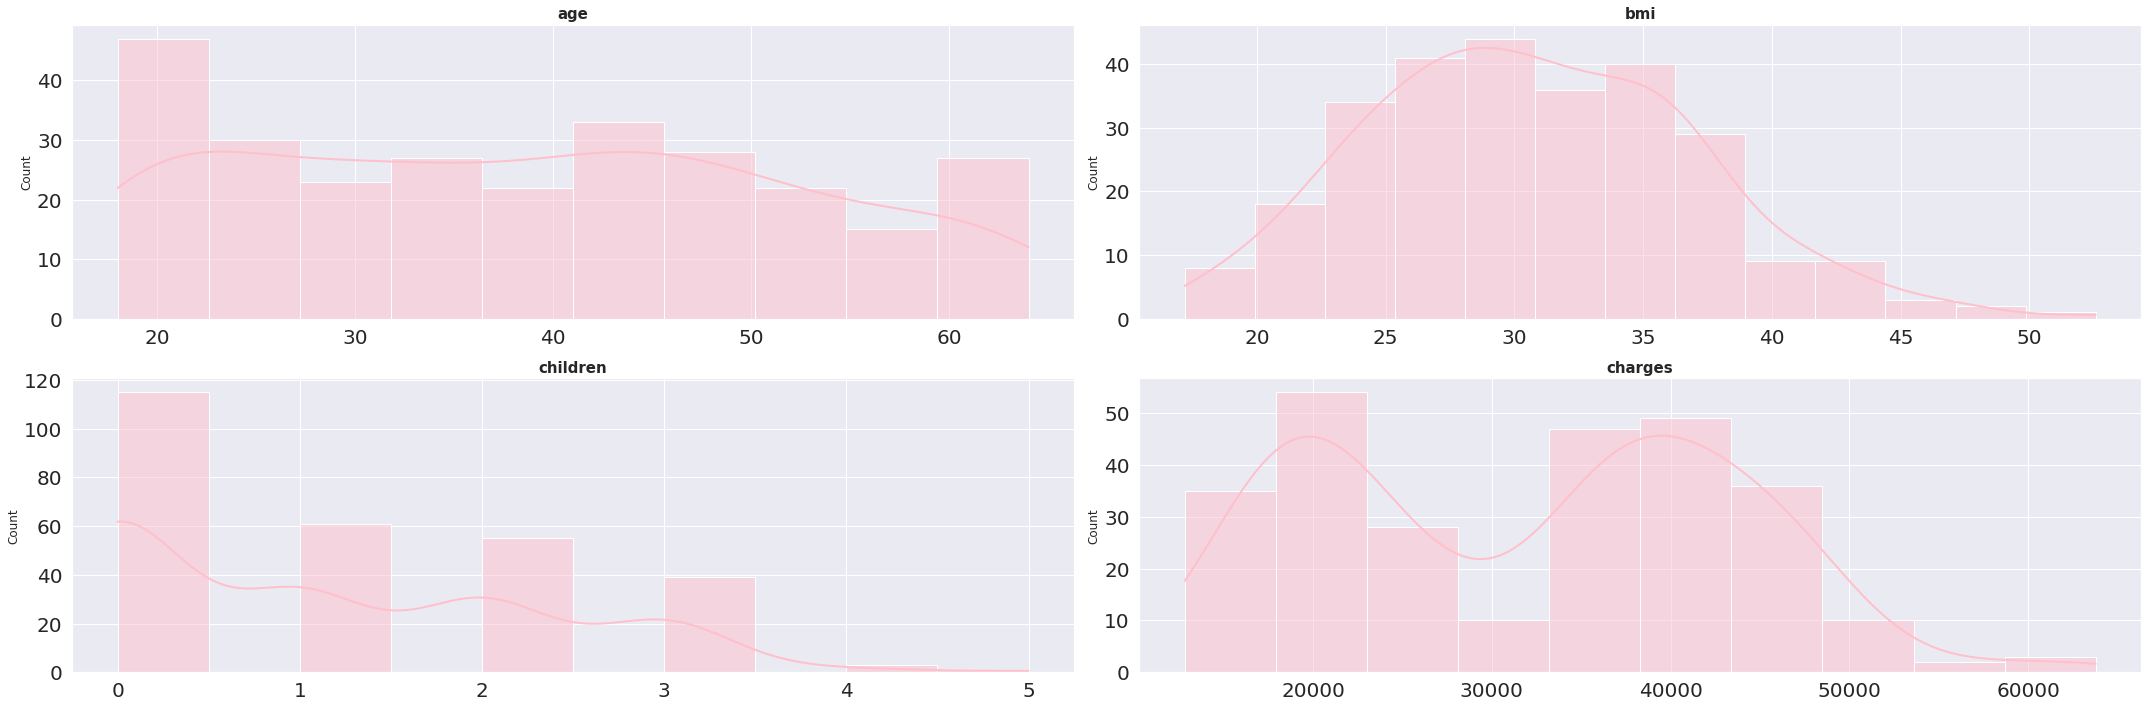

In [126]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas1.columns): 
    sns.histplot(
        data = numericas1[colum],
        kde = True,
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

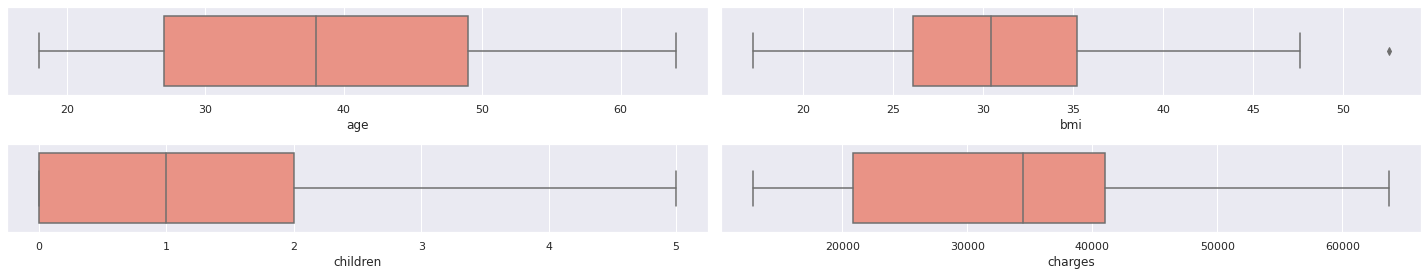

In [127]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas1.columns):
    sns.boxplot(x = numericas1[columna], data = df1, ax=axes[indice], color = "#fa8775"); # para trazar una línea de densidad 
plt.tight_layout()
plt.show();

In [128]:
df1.shape #comprobamos el tamaño de nuestro nuevo posible dataset

(274, 7)

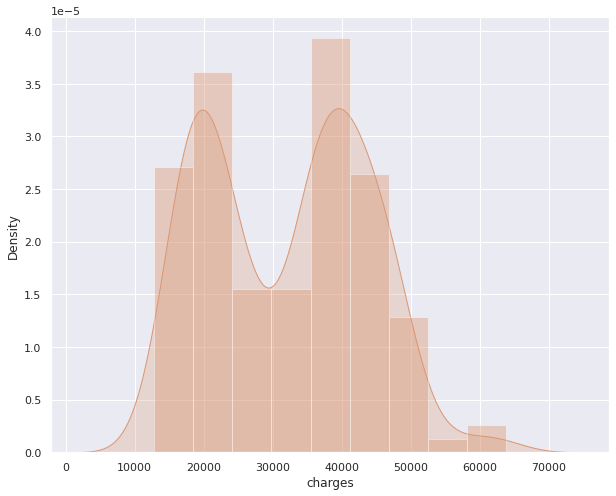

In [129]:
# vamos a ver visualmente como está distribuida la variable respuesta segun fumadores
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df1["charges"], 
    #hist = False, 
    color = "#db9671", 
    kde_kws = {"shade": True, "linewidth": 1});

---

## Personas NO fumadoras

In [130]:
df2 = df[(df['smoker'] == 'no')]
df2.sample(5)

,age,sex,bmi,children,smoker,region,charges
470,27,male,32.67,0,no,southeast,2497.0383
95,28,female,37.62,1,no,southeast,3766.8838
194,18,male,34.43,0,no,southeast,1137.4697
1061,57,male,27.94,1,no,southeast,11554.2236
6,46,female,33.44,1,no,southeast,8240.5896


In [131]:
df2.shape

(1063, 7)

In [132]:
numericas2 = df2.select_dtypes(include = np.number)

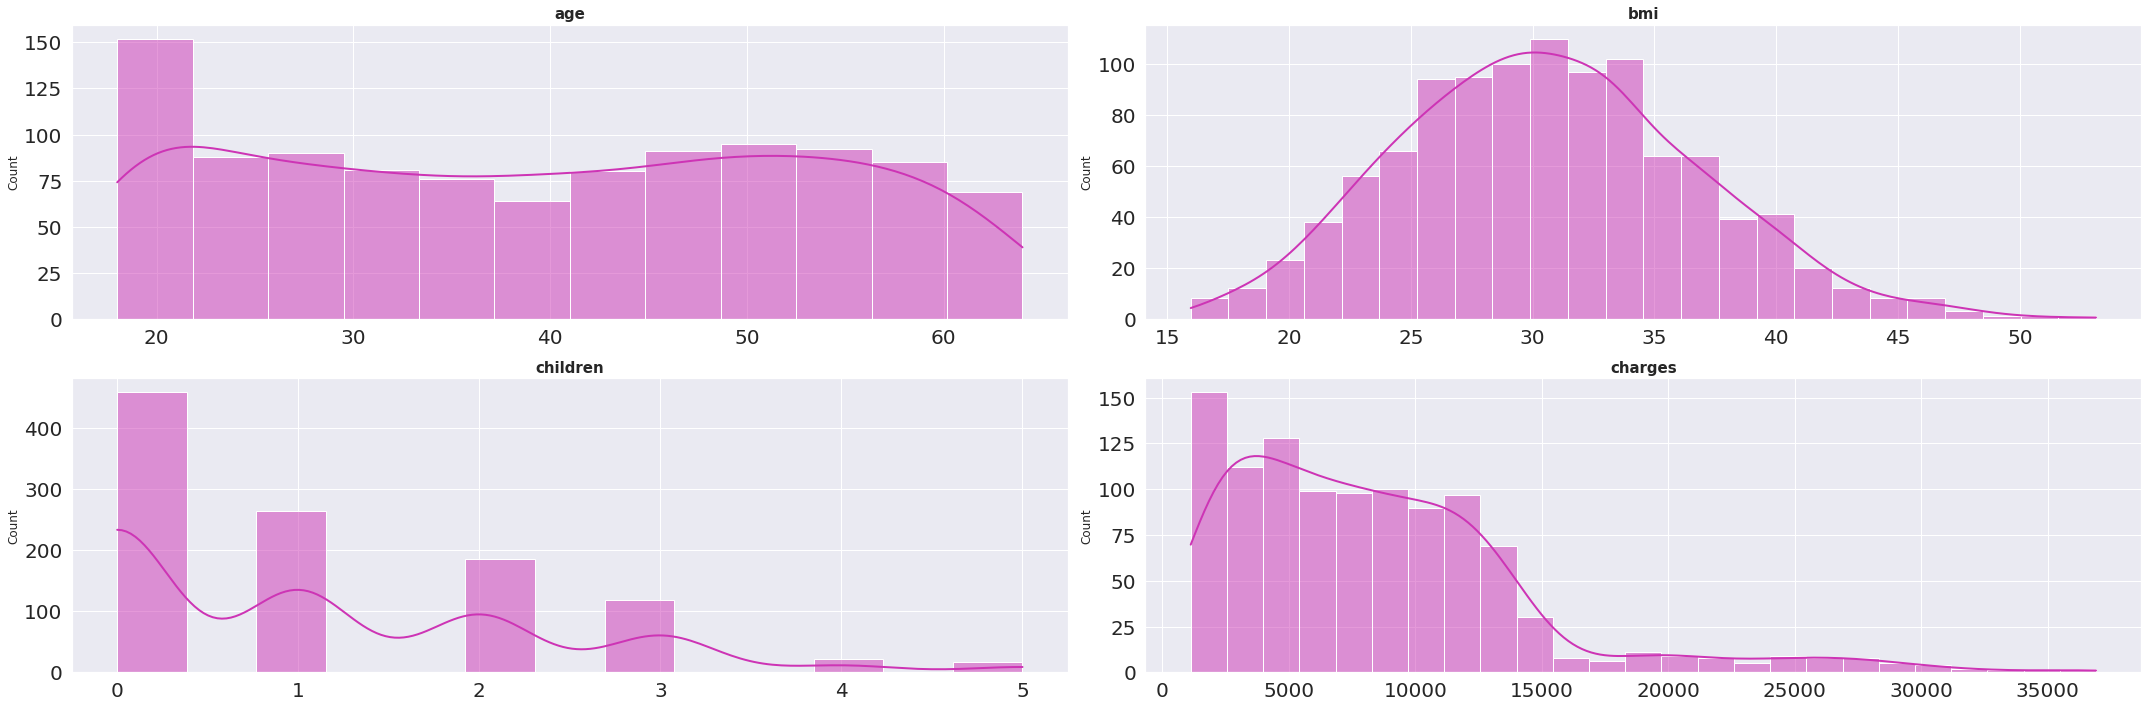

In [133]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas2.columns): 
    sns.histplot(
        data = numericas2[colum],
        kde = True,
        color = "#cd34b5", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

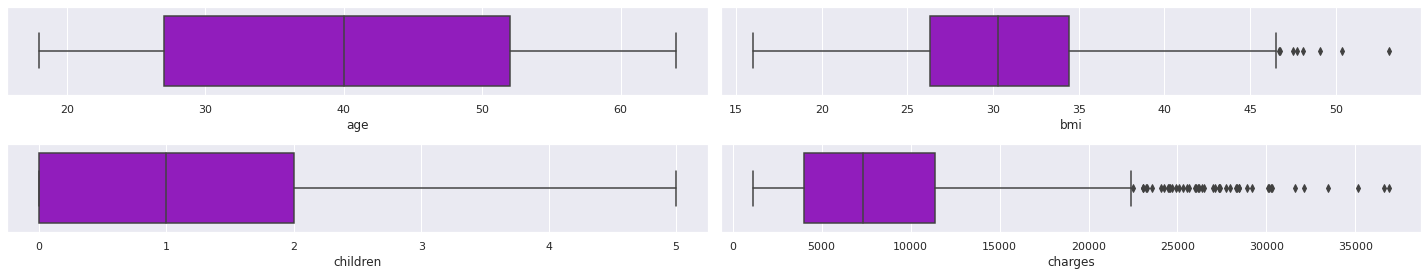

In [134]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df2, ax=axes[indice], color = "#9d02d7");
plt.tight_layout()
plt.show();

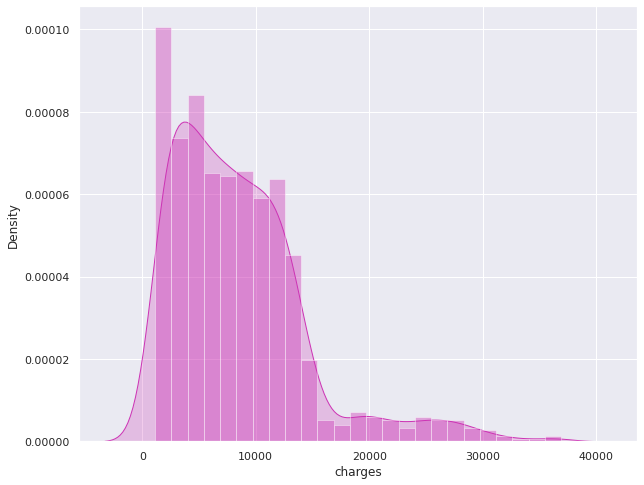

In [135]:
# vamos a ver visualmente como está distribuida la variable respuesta segun no fumadores
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df2["charges"], 
    #hist = False, 
    color = "#cd34b5", 
    kde_kws = {"shade": True, "linewidth": 1});

### Exploarmos según edad

<AxesSubplot:xlabel='age', ylabel='charges'>

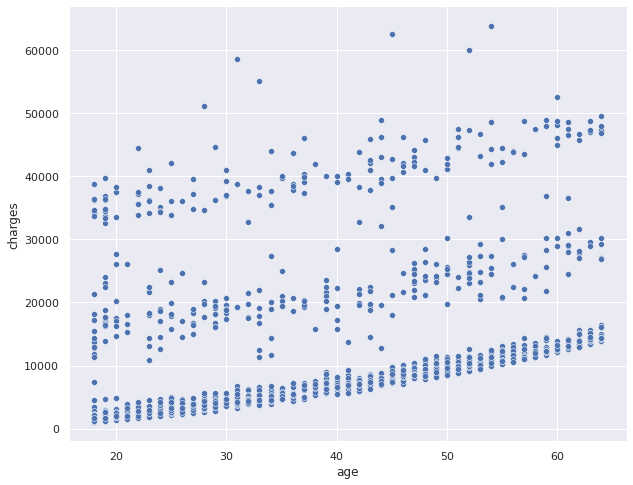

In [136]:
sns.scatterplot(y='charges', x='age', data=df)

Vemos, que hay tres lineas claras de distribución, que podrian identificar las tres 'chepas' de distribución de la variable respuesta, así que vamos a explorar dividiendo entre primas altas y bajas(en vez de las tres categorias que serían altas, medias y bajas que se justificarian con esta distribución segín edades). Ponemos el corte en 20000.

# Primas bajas

In [137]:
df3 = df[(df['charges']<20000)]
df3.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [138]:
numericas3 = df3.select_dtypes(np.number)
numericas3.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


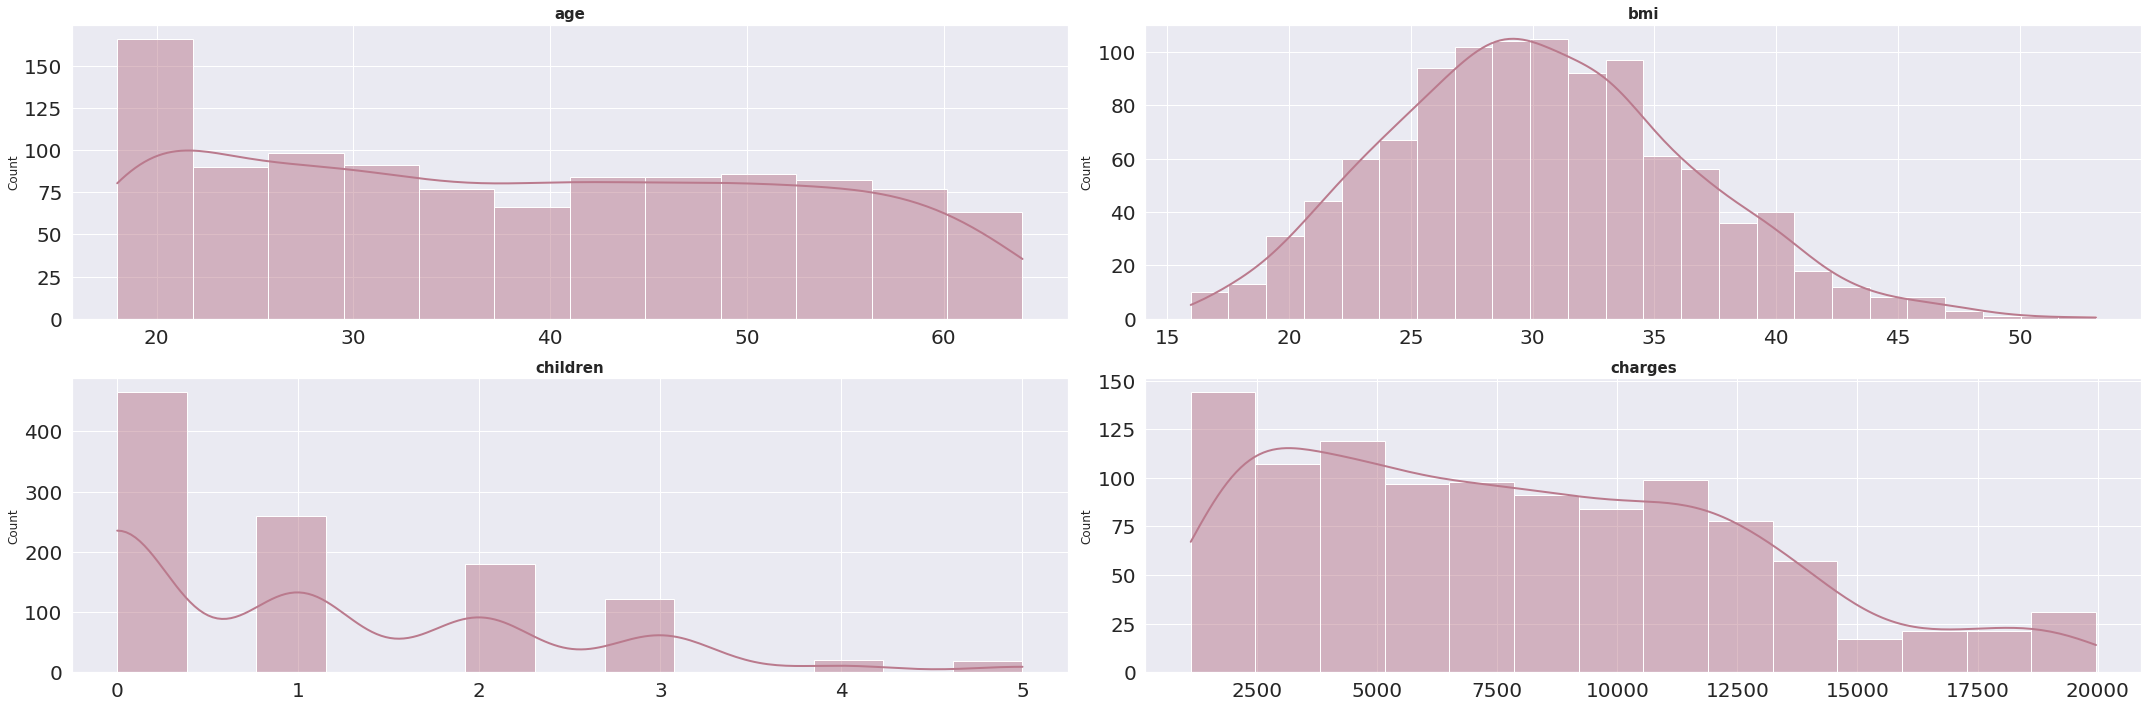

In [139]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas3.columns): 
    sns.histplot(
        data = numericas3[colum],
        kde = True,
        color = "#ba7a8d", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

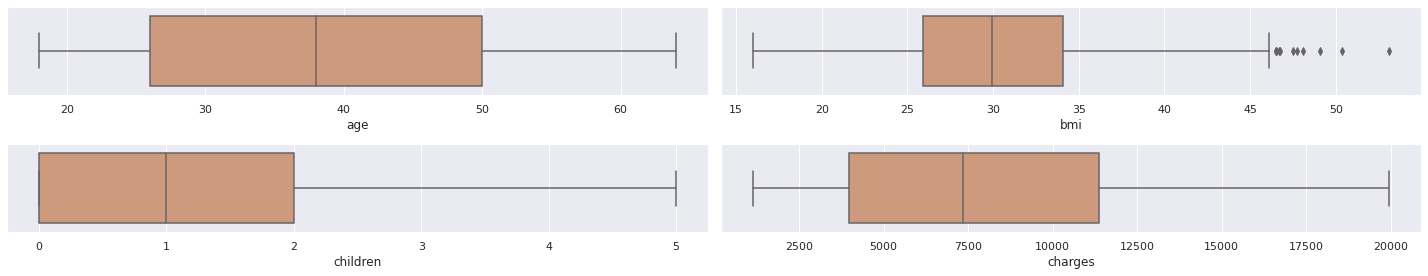

In [140]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas3.columns):
    sns.boxplot(x = numericas3[columna], data = df3, ax=axes[indice], color = "#db9671")
plt.tight_layout()
plt.show();

In [141]:
df3.shape

(1064, 7)

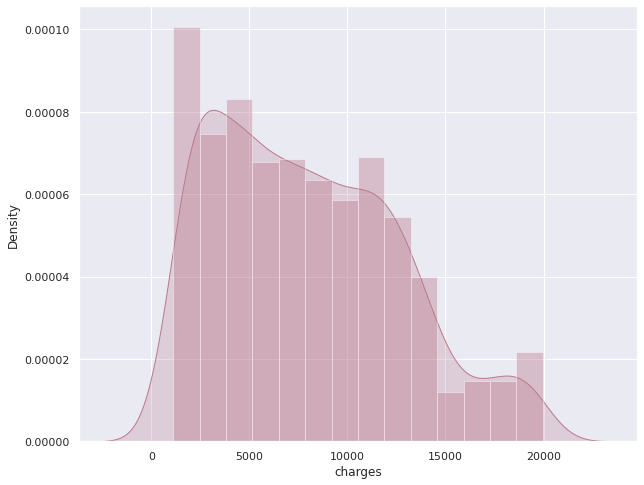

In [142]:
# vamos a ver visualmente como está distribuida la variable respuesta segun cargos bajos
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df3["charges"], 
    #hist = False, 
    color = "#ba7a8d", 
    kde_kws = {"shade": True, "linewidth": 1});

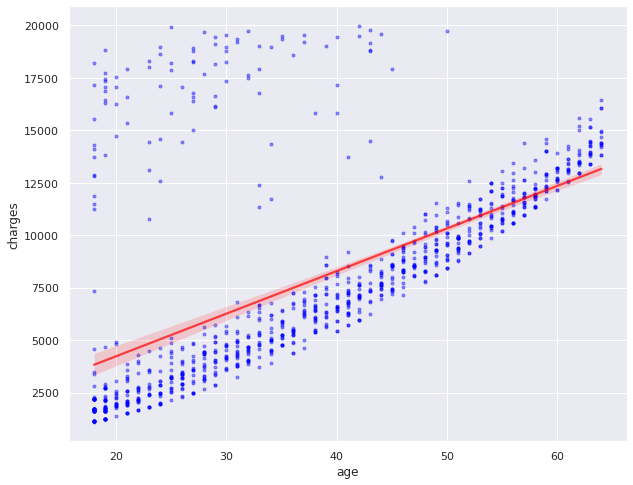

In [143]:
sns.regplot(
        x = df3['age'], 
        y = df3["charges"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 } );

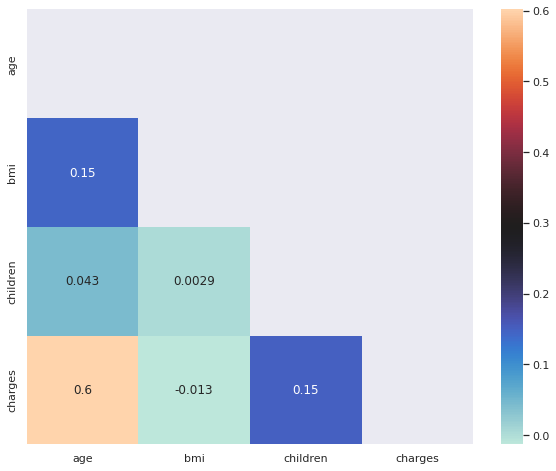

In [144]:
mask = np.triu(np.ones_like(df3.corr(), dtype = np.bool))
sns.heatmap(df3.corr(), 
           cmap = "icefire", 
            mask = mask,
           annot = True);

---

# Primas altas

In [145]:
df4 = df[(df['charges']>=20000)]
df4.head(2)

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692


In [146]:
numericas4=df4.select_dtypes(np.number)

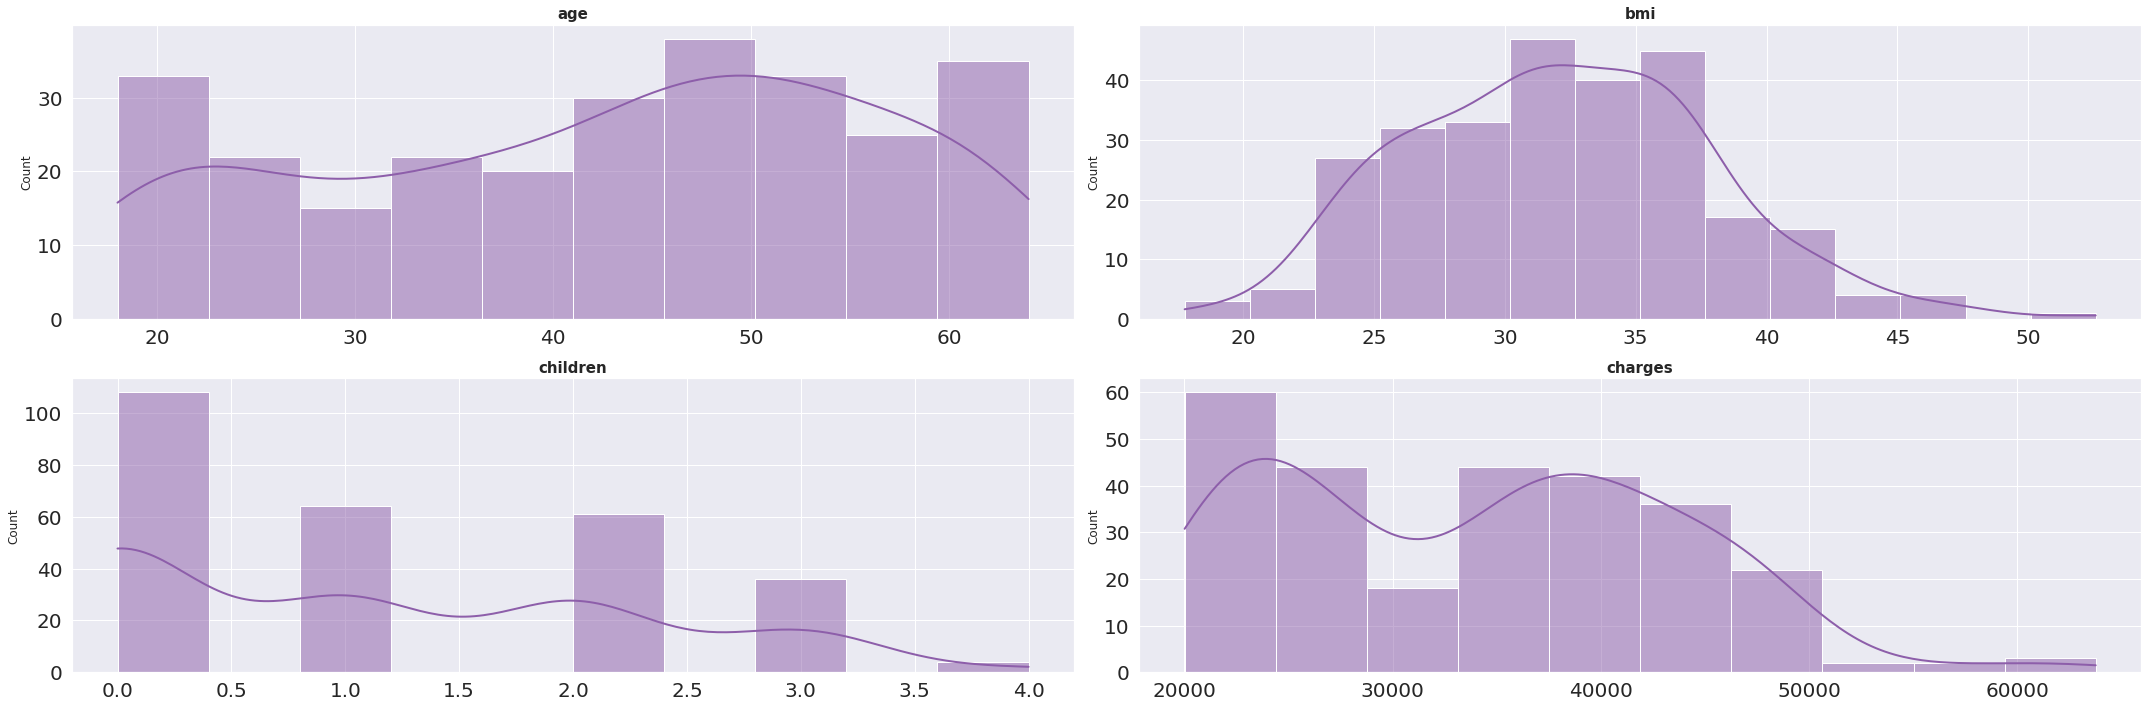

In [147]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas4.columns): 
    sns.histplot(
        data = numericas4[colum],
        kde = True,
        color = '#8d5eaa', 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

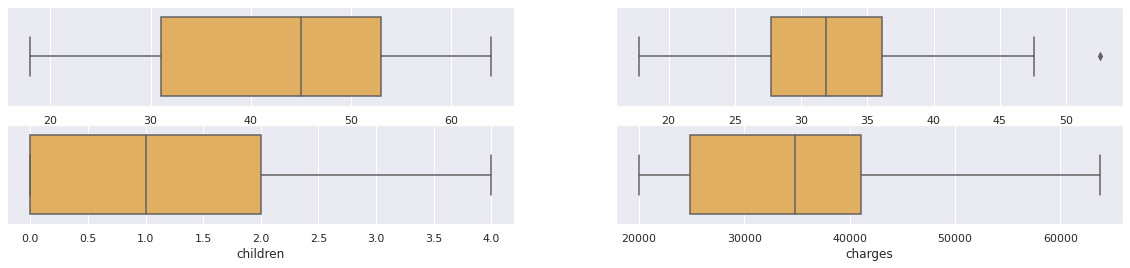

In [148]:
fig, axes = plt.subplots(2,2, figsize=(20,4))
axes = axes.flat
for indice, columna in enumerate(numericas4.columns):
    sns.boxplot(x = numericas4[columna], data = df4, ax=axes[indice], color = '#f6b44d')
plt.show();

In [149]:
df4.shape

(273, 7)

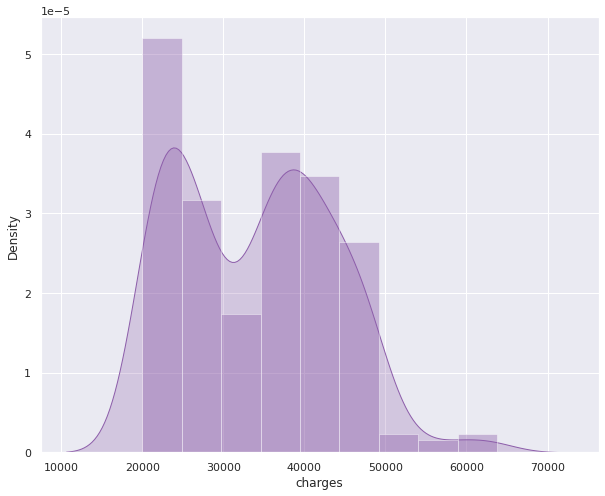

In [150]:
# vamos a ver visualmente como está distribuida la variable respuesta segun cargos altos
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df4["charges"], 
    #hist = False, 
    color = '#8d5eaa', 
    kde_kws = {"shade": True, "linewidth": 1});

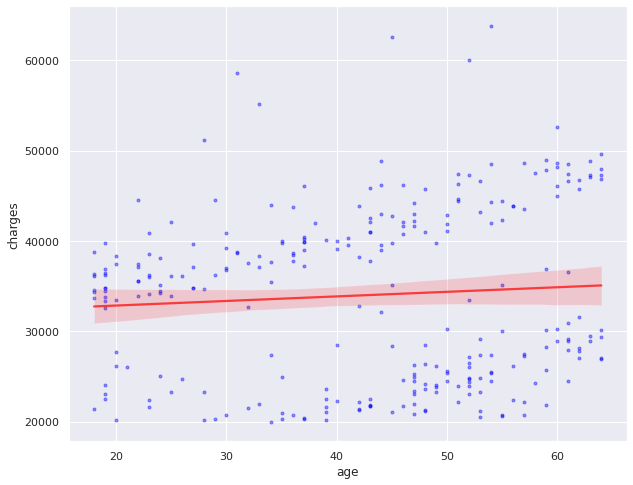

In [151]:
sns.regplot(
        x = df4['age'], 
        y = df4["charges"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 });

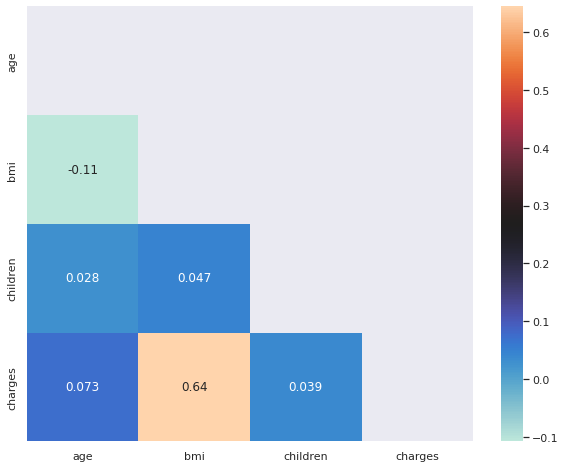

In [152]:
mask = np.triu(np.ones_like(df4.corr(), dtype = np.bool))
sns.heatmap(df4.corr(), 
           cmap = "icefire", 
            mask = mask,
           annot = True);

## Vemos que en las primas bajas existe relación con la edad, pero, que en primas altas, no, asi que vamos a estudiar que otras variables pueden estar afectando a las primas altas.

Primas altas para fumadores

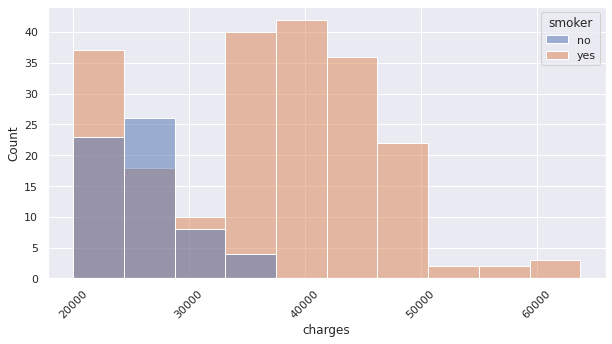

In [153]:
plt.figure(figsize = (10,5)) 
sns.histplot(data =df4, x = "charges", hue = "smoker") 
plt.xticks(rotation = 45);

Primas bajas para fumadores

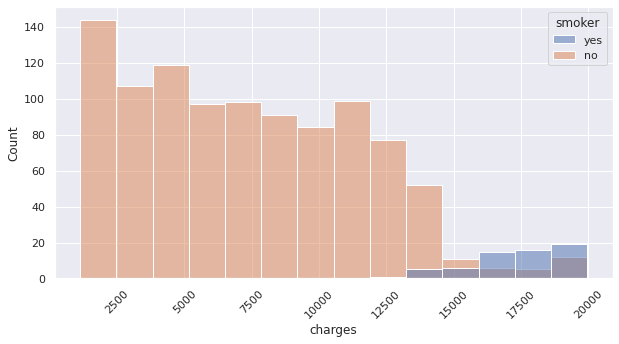

In [154]:
plt.figure(figsize = (10,5)) 
sns.histplot(data =df3, x = "charges", hue = "smoker") 
plt.xticks(rotation = 45);

fumadores para el df general

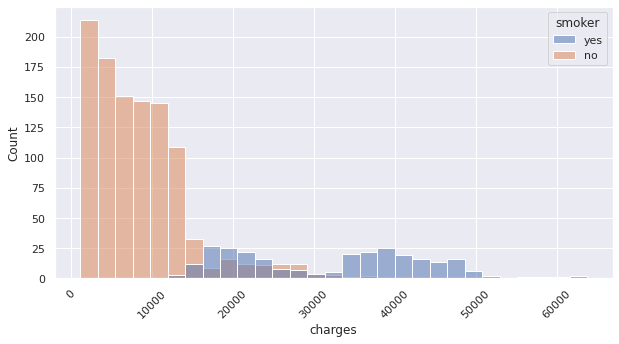

In [155]:
plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.histplot(data =df, x = "charges", hue = "smoker") 
plt.xticks(rotation = 45);

In [156]:
df3['smoker'].value_counts()

no     1002
yes      62
Name: smoker, dtype: int64

In [157]:
df4['smoker'].value_counts()

yes    212
no      61
Name: smoker, dtype: int64

In [158]:
df3.shape

(1064, 7)

In [159]:
df4.shape

(273, 7)

In [160]:
w=df3['charges'].mean()

In [161]:
df3.shape[0]*w

8476250.48524899

In [162]:
c=df4['charges'].mean()

In [163]:
df4.shape[0]*c

9277934.94241

---

        Tenemos dos dataframes resultantes de las dos jorobas de 'charges',
        la de primas bajas mas relacionada con edades, 
        y la de altas, relacionada con hábitos tabaquicos.

>Segun la muestra, económicamente, son similares para la compañia pero con n muy dispares,
 >optamos por quedarnos con las primas bajas, con una n más alta, 
 >y relacionar dos variables numéricas, edad y prima. Ya que el tiempo de pair, es limitado.


> Gráficamente vemos claramente que las primas altas, se relacionan más con el hábito tabaquico si y edades altas, y las primas bajas, a penas tienen representacion de ese grupo.

> Calculando media de primas y numero de registros, el impacto economico de ambos grupos en los que hemos dividido la muestra es bastante similar.

# Gestión de Outliers de nuestro dataset 'Primas bajas'

In [164]:
numericas3=df3.select_dtypes(np.number)
numericas3

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620
4,32,28.88,0,3866.8552
5,31,25.74,0,3756.6216
...,...,...,...,...
1332,52,44.70,3,11411.6850
1333,50,30.97,3,10600.5483
1334,18,31.92,0,2205.9808
1335,18,36.85,0,1629.8335


In [165]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [166]:
numericas3=df3.drop('charges', axis=1)
numericas3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.2+ KB


In [167]:
numericas3_bis=numericas3.select_dtypes(np.number)
numericas3_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   bmi       1064 non-null   float64
 2   children  1064 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.2 KB


In [168]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices 

In [169]:
lista_columnas3 = list(numericas3_bis.columns)
ind3 = detectar_outliers(lista_columnas3, numericas3)

In [170]:
ind3.keys()

dict_keys(['bmi'])

In [171]:
# Iteramos por el diccionario que hemos creado con los índices de los outliers
for k, v in ind3.items():
    # Sacamos la mediana de cada columna numérica
    mediana = df3[k].median()
    # iteramos por cada fila de la columna en la que hay outliers y convertimos ese valor en la mediana
    for i in v:
        df3.loc[i,k] = mediana

In [172]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 98.8+ KB


# Guardamos los nuevos archivos con las divisiones

In [173]:
df1.to_csv("../data/01-dataframe_fumadores.csv" )

In [174]:
df2.to_csv("../data/02-dataframe_no_fumadores.csv" )

In [175]:
df3.to_csv("../data/03-primas_bajas.csv" )

In [176]:
df4.to_csv("../data/04-primas_altas.csv" )